# Worksheet

## Linear Regression

Where does randomness come from?

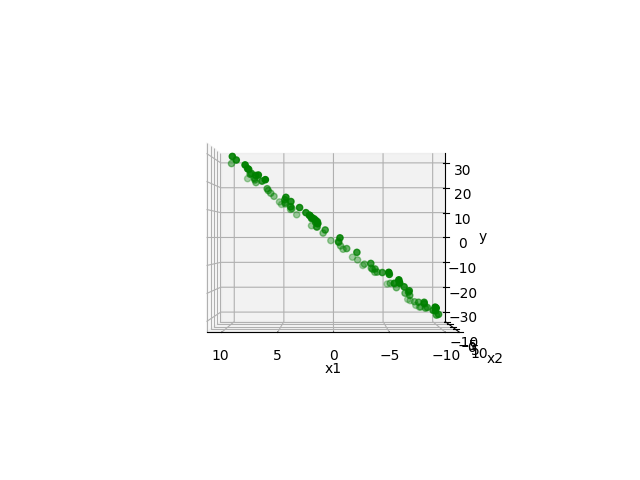

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')
ax.view_init(0, 90)

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

In [11]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

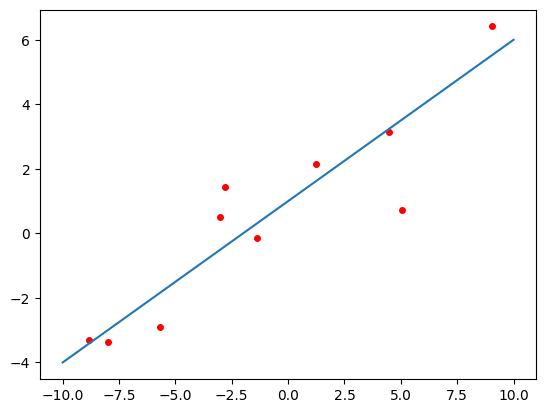

In [31]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

true_beta = np.array([ 1 , .5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
xplot = np.linspace(-10, 10, 100)
plt.plot(x,y,'ro',markersize=4)
plt.plot(xplot, true_beta[0] + true_beta[1] * xplot)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

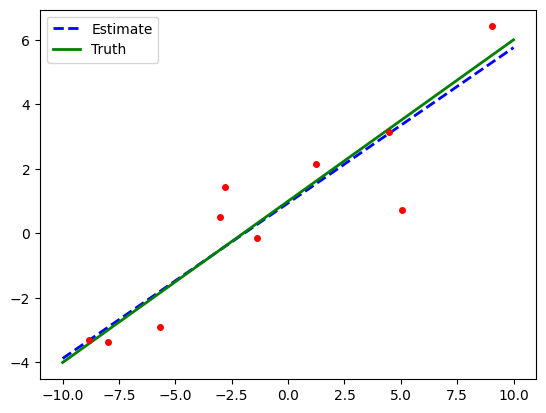

In [32]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,100)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

In [26]:
print(beta_hat)

[0.95325244 0.50409886]


c) How does the estimate of `beta` compare to the parameters we used to generate the data?

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

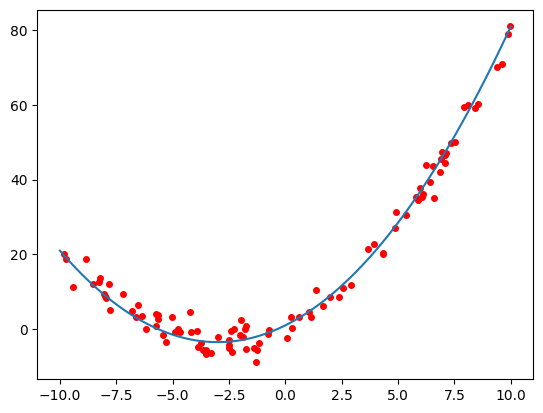

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3, .5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE) * 3
xplot = np.linspace(-10, 10, 100)
plt.plot(x,y,'ro',markersize=4)
plt.plot(xplot, true_beta[0] + true_beta[1] * xplot + true_beta[2] * xplot ** 2)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

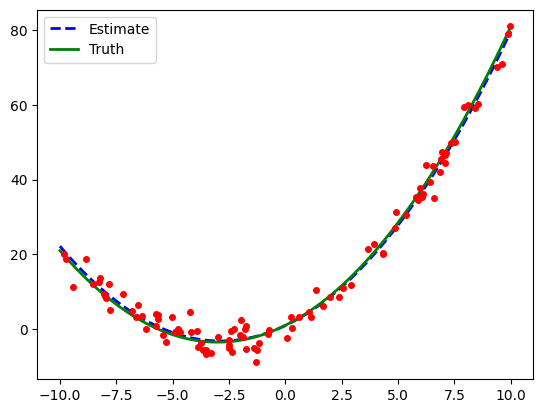

In [47]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,100)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot ** 2
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot ** 2, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

In [48]:
print(beta_hat)

[0.94458944 2.87548115 0.50010235]


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

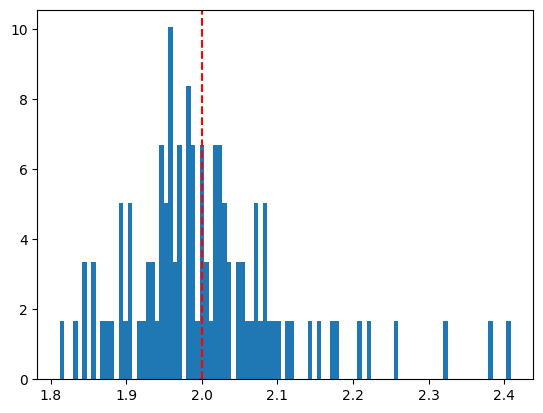

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 5
betas = []
true_beta = np.array([ 1, 2 ])
for _ in range(100):
    x = -10 + 20 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])

    X = np.array([intercept, x]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

plt.hist(np.array(betas)[:, 1], bins=100, density=True)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()